<a href="https://colab.research.google.com/github/Mahesh-Wijerathna/EC-7212-TakeHome2-4291/blob/main/TakeHome_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python matplotlib

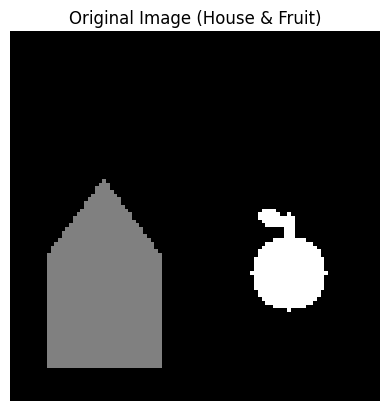

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create blank image
image = np.zeros((100, 100), dtype=np.uint8)

# === Draw House ===

cv2.rectangle(image, (10, 60), (40, 90), 85, -1)
house_roof = np.array([[10, 60], [25, 40], [40, 60]], np.int32)
cv2.fillPoly(image, [house_roof], 85)

# === Draw Fruit
cv2.circle(image, (75, 65), 10, 170, -1)
cv2.line(image, (75, 55), (75, 50), 170, 2)
cv2.ellipse(image, (70, 50), (3, 2), 30, 0, 360, 170, -1)

# === Show image ===
plt.imshow(image, cmap='gray')
plt.title("Original Image (House & Fruit)")
plt.axis('off')
plt.show()


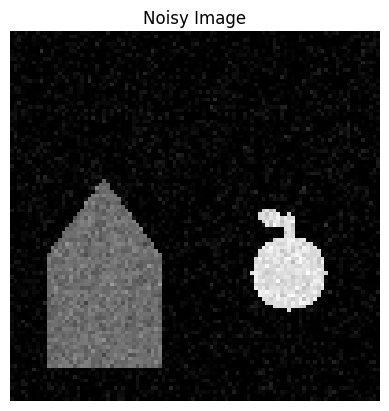

In [11]:
mean = 0
sigma = 10
gaussian = np.random.normal(mean, sigma, image.shape)
noisy_image = np.clip(image + gaussian, 0, 255).astype(np.uint8)

plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()


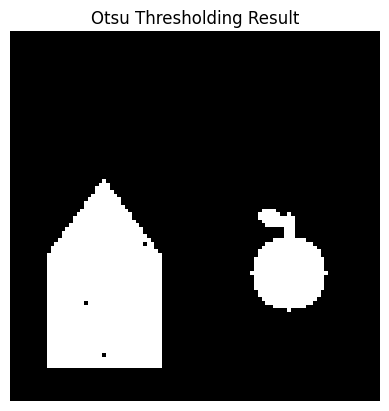

In [12]:
# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Thresholding Result")
plt.axis('off')
plt.show()


In [13]:
def region_growing(img, seed_point, threshold=10):
    height, width = img.shape
    segmented = np.zeros_like(img)
    visited = np.zeros_like(img, dtype=bool)

    seed_value = img[seed_point]
    to_visit = [seed_point]

    while to_visit:
        x, y = to_visit.pop()
        if visited[x, y]:
            continue

        visited[x, y] = True
        if abs(int(img[x, y]) - int(seed_value)) < threshold:
            segmented[x, y] = 255
            # Check 4 neighbors
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width:
                    to_visit.append((nx, ny))

    return segmented


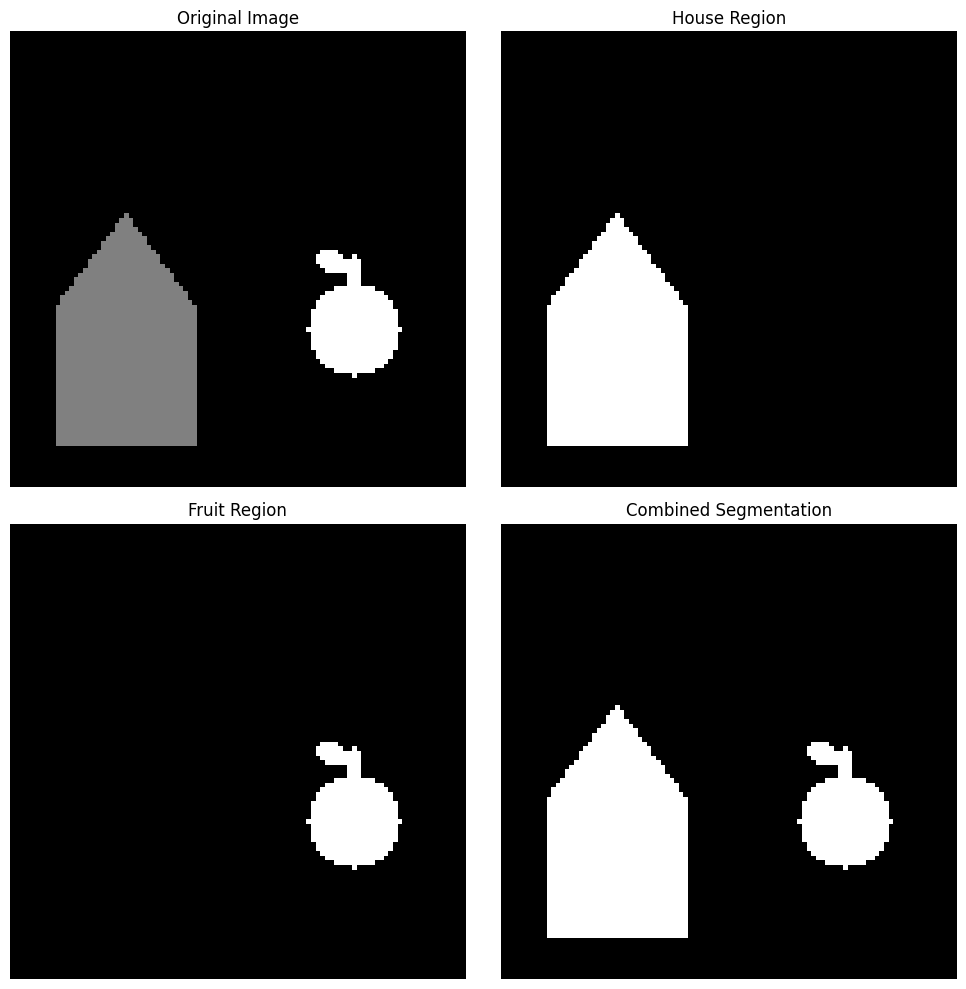

In [18]:
# === Step 1: Create Image with House and Apple ===
img = np.zeros((100, 100), dtype=np.uint8)

# Draw house
cv2.rectangle(img, (10, 60), (40, 90), 85, -1)
roof = np.array([[10, 60], [25, 40], [40, 60]], np.int32)
cv2.fillPoly(img, [roof], 85)

# Draw apple
cv2.circle(img, (75, 65), 10, 170, -1)
cv2.line(img, (75, 55), (75, 50), 170, 2)
cv2.ellipse(img, (70, 50), (3, 2), 30, 0, 360, 170, -1)

# === Step 2: Seed Points ===
house_seed = (70, 20)   # Inside house region
apple_seed = (65, 75)   # Inside apple region

# === Step 3: Region Growing ===
house_mask = region_growing(img, house_seed, threshold=5)
apple_mask = region_growing(img, apple_seed, threshold=5)

# === Step 4: Combine Masks ===
combined_mask = cv2.bitwise_or(house_mask, apple_mask)

# === Step 5: Display in 2x2 Grid ===
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Original
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')

# House region
ax[0,1].imshow(house_mask, cmap='gray')
ax[0,1].set_title("House Region")
ax[0,1].axis('off')

# Apple region
ax[1,0].imshow(apple_mask, cmap='gray')
ax[1,0].set_title("Fruit Region")
ax[1,0].axis('off')

# Combined
ax[1,1].imshow(combined_mask, cmap='gray')
ax[1,1].set_title("Combined Segmentation")
ax[1,1].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'img' is not defined

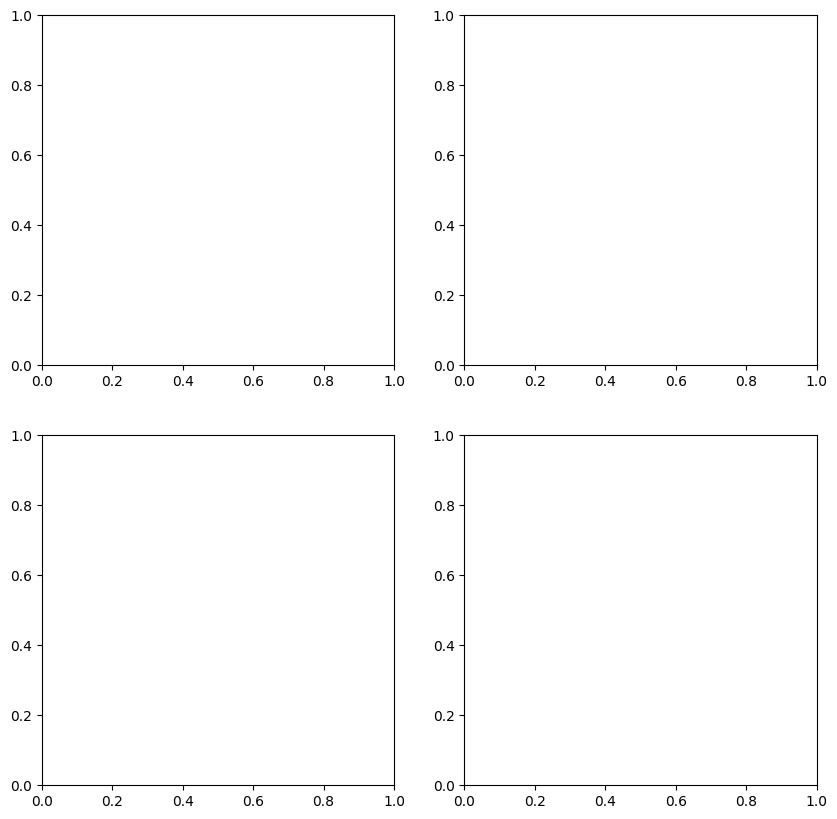